In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, f1_score, accuracy_score

In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
numerical = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

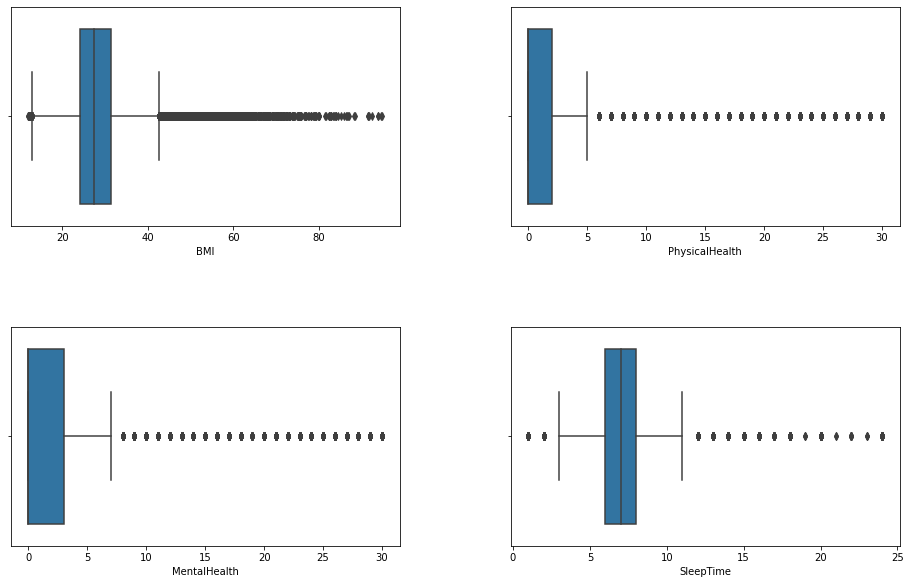

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=8.0)
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=heart[variable], ax=subplot)

In [7]:
categorical = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [8]:
heart['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [9]:
# Consolidate Yes No categories in Diabetic column
heart.loc[heart['Diabetic']=='No, borderline diabetes','Diabetic']='No'
heart.loc[heart['Diabetic']=='Yes (during pregnancy)','Diabetic']='Yes'

In [10]:
heart['Diabetic'].value_counts()

No     276434
Yes     43361
Name: Diabetic, dtype: int64

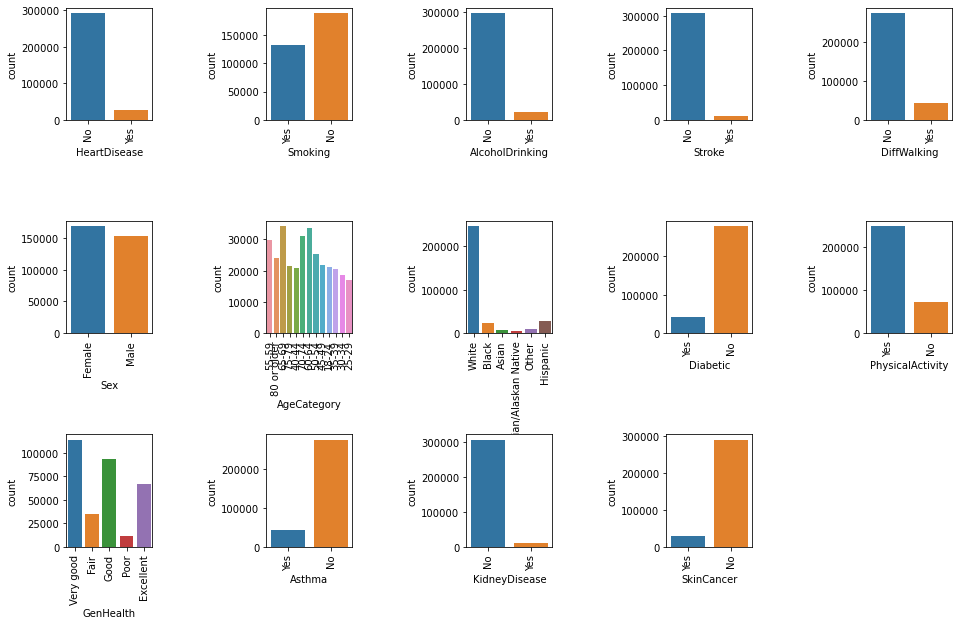

In [11]:
fig, ax = plt.subplots(3,5, figsize=(15,10))
fig.tight_layout(pad=8.0)
fig.delaxes(ax[2,4])
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=heart[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [12]:
# Turn all Yes No into 1 and 0
heart.replace(('Yes', 'No'), (1, 0), inplace=True)

In [13]:
# Turn ordinal category into ordinal numbers - GenHealth
categories=[['Poor','Fair','Good','Very good','Excellent']]
ordinal_encoder = OrdinalEncoder(categories=categories)
heart['GenHealth'] = ordinal_encoder.fit_transform(heart[['GenHealth']])

In [14]:
# Turn ordinal category into ordinal numbers - AgeCategory
categories=[['18-24','25-29','30-34','35-39','40-44','45-49','50-54',
             '55-59','60-64','65-69','70-74','75-79','80 or older']]
ordinal_encoder = OrdinalEncoder(categories=categories)
heart['AgeCategory'] = ordinal_encoder.fit_transform(heart[['AgeCategory']])

In [15]:
# Turn non-ordinal, non-yes/no category into counts - Sex and Race
heart = pd.get_dummies(heart, columns = ['Sex','Race'])

In [16]:
print(heart.shape)
print('column names: \n')
print('\n'.join(list(heart.columns)))

(319795, 24)
column names: 

HeartDisease
BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
AgeCategory
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer
Sex_Female
Sex_Male
Race_American Indian/Alaskan Native
Race_Asian
Race_Black
Race_Hispanic
Race_Other
Race_White


In [17]:
scaler=MinMaxScaler()
heart_scaled=scaler.fit_transform(heart)

In [18]:
heart_scaled=pd.DataFrame(heart_scaled)
heart_scaled.columns=heart.columns
heart_scaled.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,...,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,0.583333,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.750000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,0.916667,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
heart_scaled.to_csv('heart_scaled.csv',index=False)

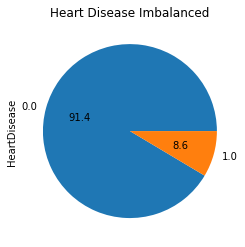

In [20]:
ax=heart_scaled['HeartDisease'].value_counts().plot.pie(autopct='%.1f')
_=ax.set_title('Heart Disease Imbalanced')

In [21]:
X=heart_scaled.drop(['HeartDisease'],axis=1)
y=heart_scaled['HeartDisease']

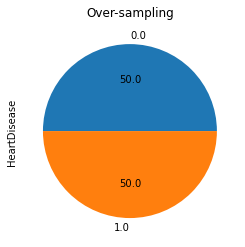

In [22]:
sm=SMOTE(random_state=0)
X_res, y_res=sm.fit_resample(X,y)

ax=y_res.value_counts().plot.pie(autopct='%.1f')
_=ax.set_title('Over-sampling')

In [23]:
m=LogisticRegression()
m.fit(X_res,y_res)

LogisticRegression()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


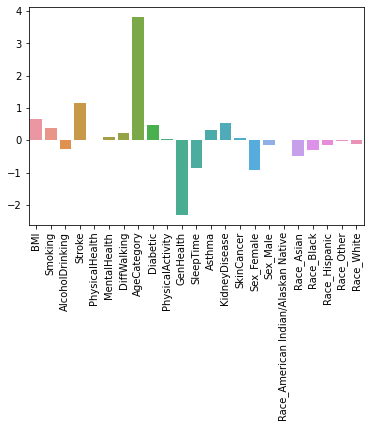

In [24]:
importance=m.coef_[0]
ax=sns.barplot([x for x in range(len(importance))], importance)
_=ax.set_xticklabels(m.feature_names_in_, rotation=90)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=0)

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.768720 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768677 (0.002038) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768675 (0.002040) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768682 (0.002039) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.768681 (0.002037) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768678 (0.002032) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768684 (0.002037) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.768693 (0.002039) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768688 (0.002034) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768696 (0.002037) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.768706 (0.002030) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768706 (0.002036) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768720 (0.002034) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768580 (0.002080) wit

In [29]:
model=LogisticRegression(solver='liblinear', penalty='l2',C=0.01)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [30]:
score = model.score(X_test, y_test)
print(score)

0.7675744069670682


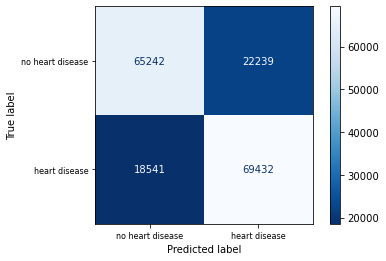

In [31]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
_, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
disp.plot(ax = ax,cmap='Blues_r')

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76     87481
         1.0       0.76      0.79      0.77     87973

    accuracy                           0.77    175454
   macro avg       0.77      0.77      0.77    175454
weighted avg       0.77      0.77      0.77    175454



In [33]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

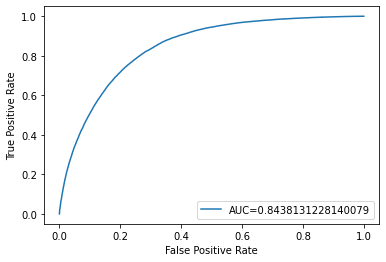

In [34]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
import pycaret

In [36]:
df=pd.concat([X_res, y_res], axis=1)

In [37]:
# import pycaret classification and init setup

from pycaret.classification import *
s = setup(df, target = 'HeartDisease', session_id = 123)

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(584844, 24)"
4,Transformed data shape,"(584844, 24)"
5,Transformed train set shape,"(409390, 24)"
6,Transformed test set shape,"(175454, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [38]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [39]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [40]:
# init setup on exp
exp.setup(df, target = 'HeartDisease', session_id = 123)

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(584844, 24)"
4,Transformed data shape,"(584844, 24)"
5,Transformed train set shape,"(409390, 24)"
6,Transformed test set shape,"(175454, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [41]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9226,0.9713,0.9224,0.9228,0.9226,0.8452,0.8452,33.1650
catboost,CatBoost Classifier,0.9183,0.9751,0.8859,0.9474,0.9156,0.8367,0.8384,42.0470
et,Extra Trees Classifier,0.9166,0.9584,0.9331,0.9032,0.9179,0.8331,0.8336,35.1840
lightgbm,Light Gradient Boosting Machine,0.9092,0.9713,0.8792,0.9353,0.9064,0.8184,0.8199,2.9780
dt,Decision Tree Classifier,0.8928,0.8935,0.8941,0.8919,0.8930,0.7857,0.7857,1.2780
gbc,Gradient Boosting Classifier,0.8724,0.9530,0.8701,0.8741,0.8721,0.7448,0.7448,25.8750
knn,K Neighbors Classifier,0.8514,0.9196,0.9285,0.8045,0.8620,0.7028,0.7113,62.8690
ada,Ada Boost Classifier,0.8354,0.9233,0.8413,0.8315,0.8364,0.6708,0.6709,7.0140
ridge,Ridge Classifier,0.7687,0.0000,0.8031,0.7515,0.7764,0.5375,0.5388,0.2830
lda,Linear Discriminant Analysis,0.7687,0.8441,0.8031,0.7515,0.7764,0.5375,0.5388,1.2320


In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.923
Random Forest: f1-score=0.923


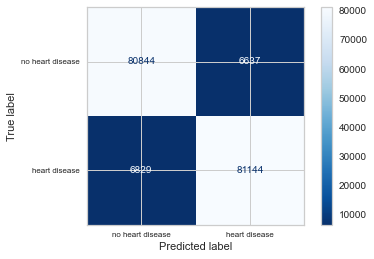

In [47]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
_, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
disp.plot(ax = ax,cmap='Blues_r')

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     87481
         1.0       0.92      0.92      0.92     87973

    accuracy                           0.92    175454
   macro avg       0.92      0.92      0.92    175454
weighted avg       0.92      0.92      0.92    175454



In [49]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

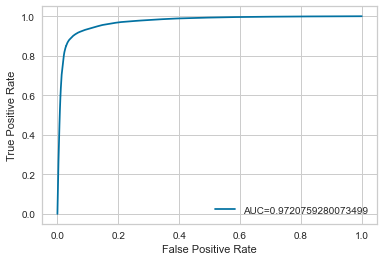

In [50]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()